In [9]:
import os
import sys
import numpy as np
from collections import OrderedDict as OD
#import uproot3
import uproot as uproot
import hist
import matplotlib.pyplot as plt
import mplhep as hep
import json

sys.path.insert(1, '../') # to import file from other directory (../ in this case)

#from htoaa_Settings import *
from htoaa_CommonTools import (
    rebinTH1, rebinTH2,
)

from HistogramListForPlottingEfficiency_TriggerStudy_GGFMode import *

In [10]:
print(f"efficiencyHistograms_dict: {json.dumps(efficiencyHistograms_dict, indent=4)}")

efficiencyHistograms_dict: {
    "hLeadingFatJetPt_msoftdropGt60_PNetMD_Hto4b_Htoaa4bOverQCDWP80": {
        "xAxisLabel": "LeadingFatJetPt_msoftdropGt60_PNetMD_Hto4b_Htoaa4bOverQCDWP80 [GeV]",
        "xAxisRange": [
            180,
            1000
        ],
        "nRebinX": 4,
        "SingleMuon_Run2018ABCD": {
            "SR_Trg_PFJet500": {
                "sSelTagNameNice": "HLT_PFJet500",
                "Numerator": [
                    {
                        "ipFileNameNice": "fIp1",
                        "histogramName": "evt/SingleMuon_Run2018A/hLeadingFatJetPt_msoftdropGt60_PNetMD_Hto4b_Htoaa4bOverQCDWP80_SR_Trg_PFJet500_noweight"
                    },
                    {
                        "ipFileNameNice": "fIp1",
                        "histogramName": "evt/SingleMuon_Run2018B/hLeadingFatJetPt_msoftdropGt60_PNetMD_Hto4b_Htoaa4bOverQCDWP80_SR_Trg_PFJet500_noweight"
                    },
                    {
                        "ipFileNameNice": 

In [11]:
if not os.path.exists(sOpDir):
    os.makedirs(sOpDir)

fIpFiles = OD()
for sIpFileName, sIpFileNameFull in sIpFiles.items():
    print(f"{sIpFileName = }, {sIpFileNameFull = }, ")
    fIpFiles[sIpFileName] = uproot.open(sIpFileNameFull)

sIpFileName = 'fIp1', sIpFileNameFull = '/eos/cms/store/user/ssawant/htoaa/analysis/20231123_TrgEffiSF_PNetMD_Hto4b_Htoaa4bOverQCDWP80/2018/analyze_htoaa_stage1.root', 


/tmp/ssawant/ipykernel_6398/1656322590.py:90: RuntimeWarning: invalid value encountered in true_divide
  hEfficiency_values = np.divide(histograms[sSelTagName][sHistNumerator].values(), histograms[sSelTagName][sHistDenominator].values())
/tmp/ssawant/ipykernel_6398/1656322590.py:90: RuntimeWarning: invalid value encountered in true_divide
  hEfficiency_values = np.divide(histograms[sSelTagName][sHistNumerator].values(), histograms[sSelTagName][sHistDenominator].values())
/tmp/ssawant/ipykernel_6398/1656322590.py:91: RuntimeWarning: invalid value encountered in sqrt
  hEfficiency_uncert = np.sqrt( hEfficiency_values * (1 - hEfficiency_values) / histograms[sSelTagName][sHistDenominator].values() ) # https://www.roma1.infn.it/~bini/StatEPP_new.pdf#page=27
/tmp/ssawant/ipykernel_6398/1656322590.py:90: RuntimeWarning: invalid value encountered in true_divide
  hEfficiency_values = np.divide(histograms[sSelTagName][sHistNumerator].values(), histograms[sSelTagName][sHistDenominator].values())

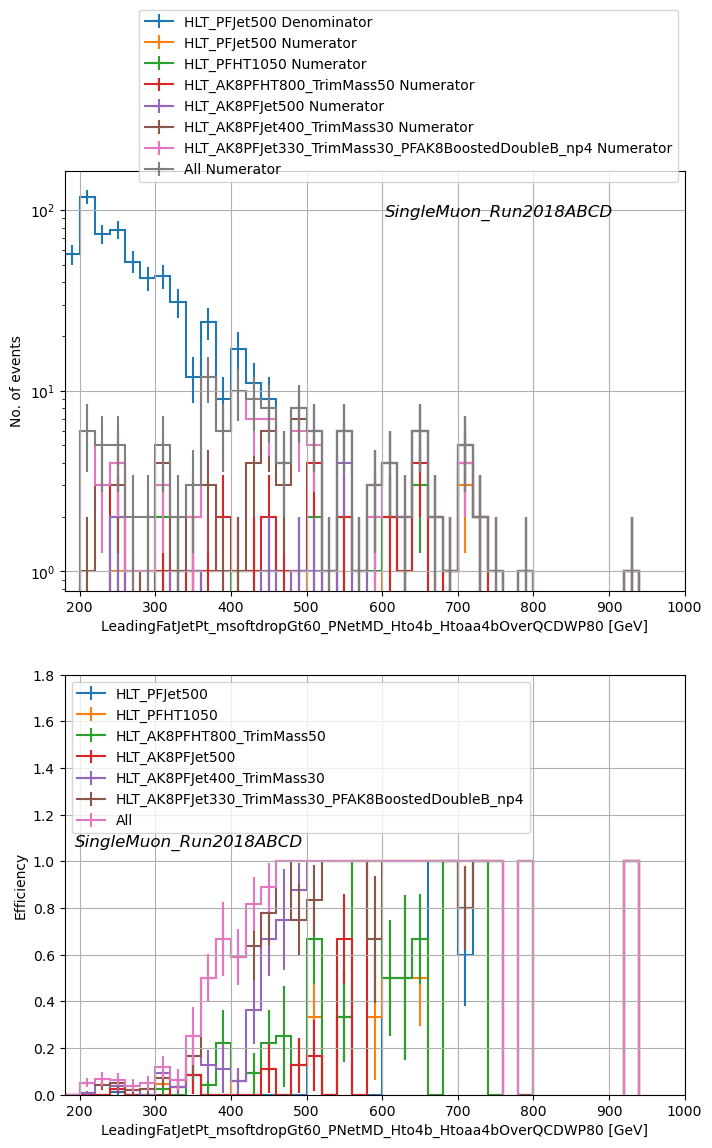

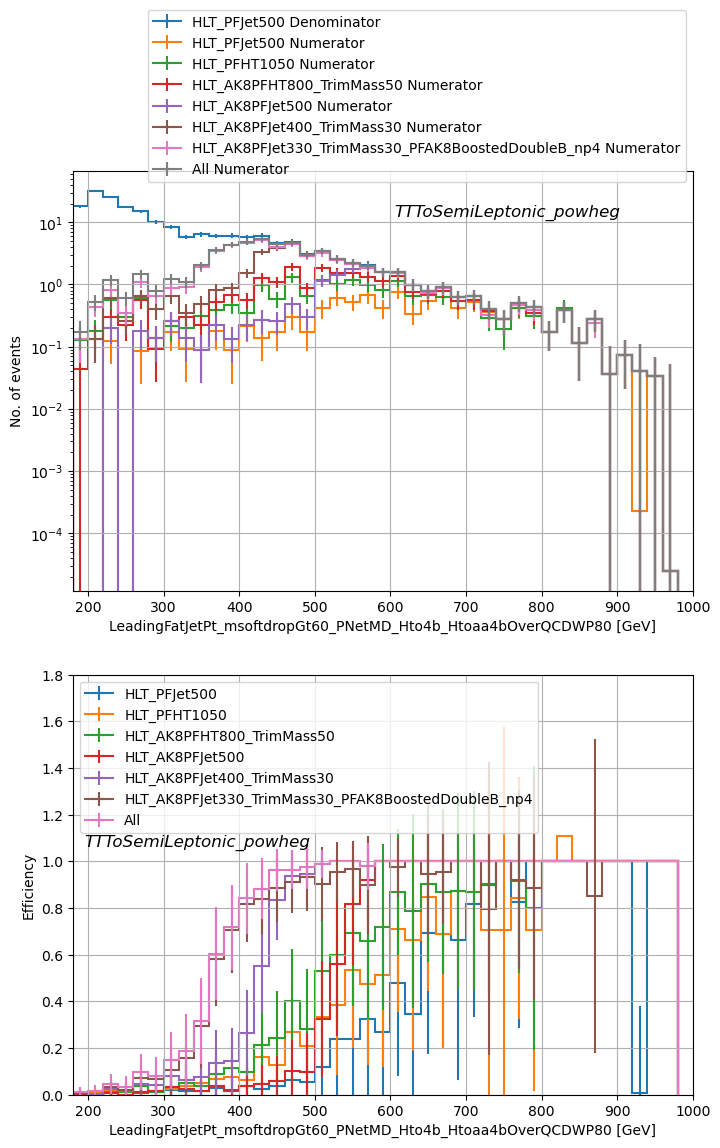

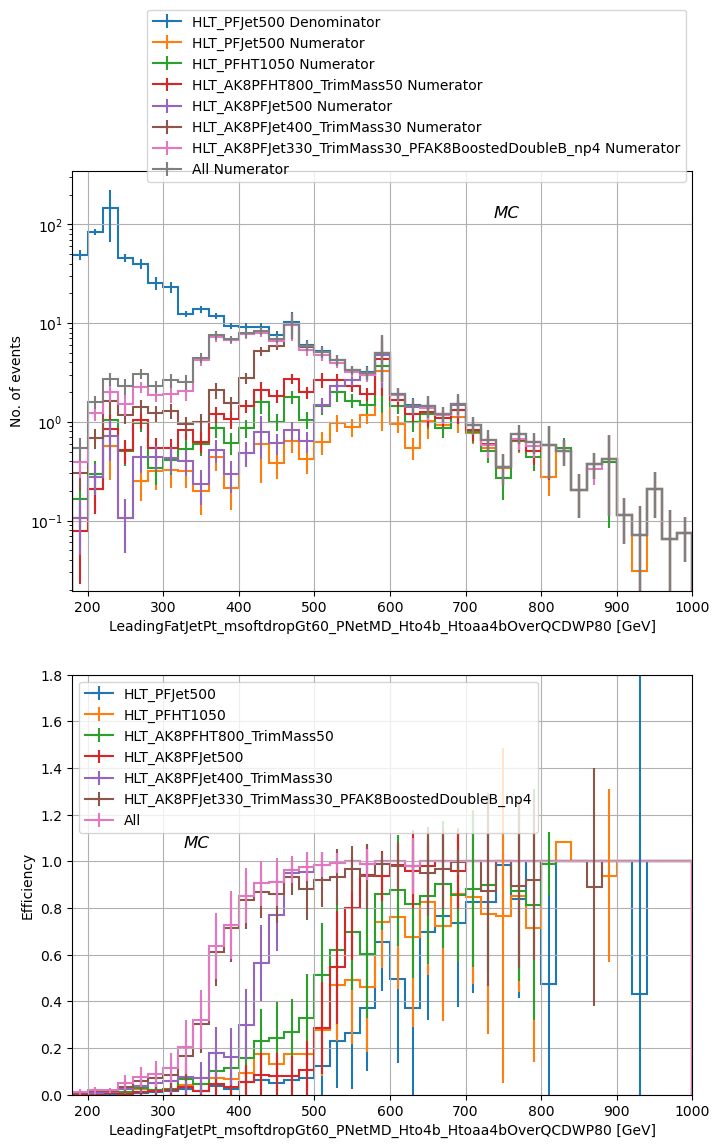

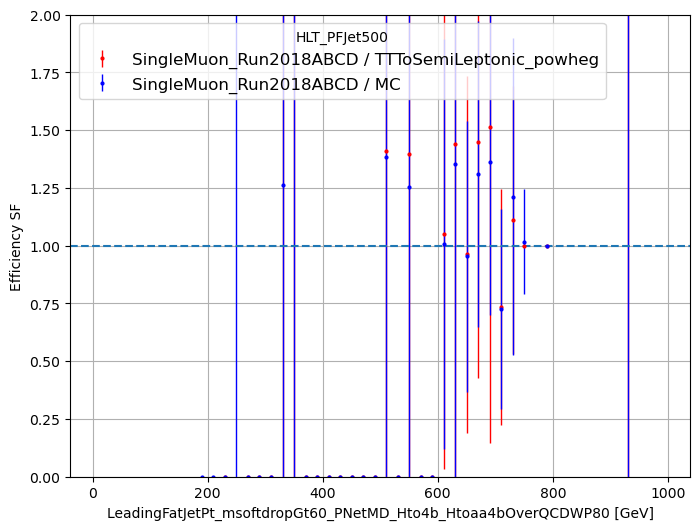

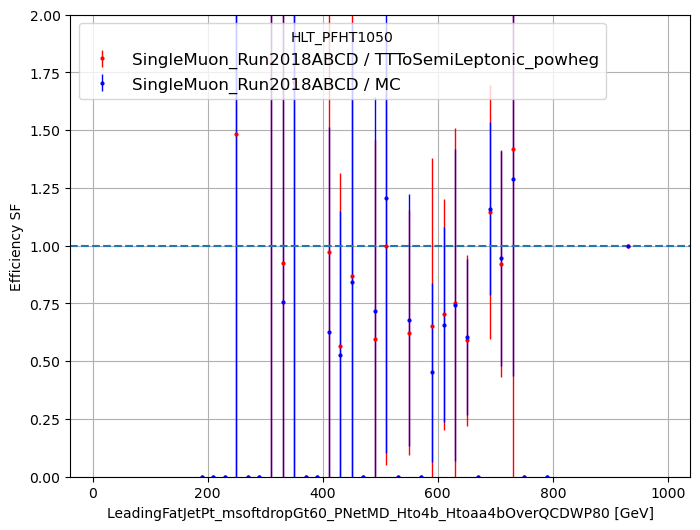

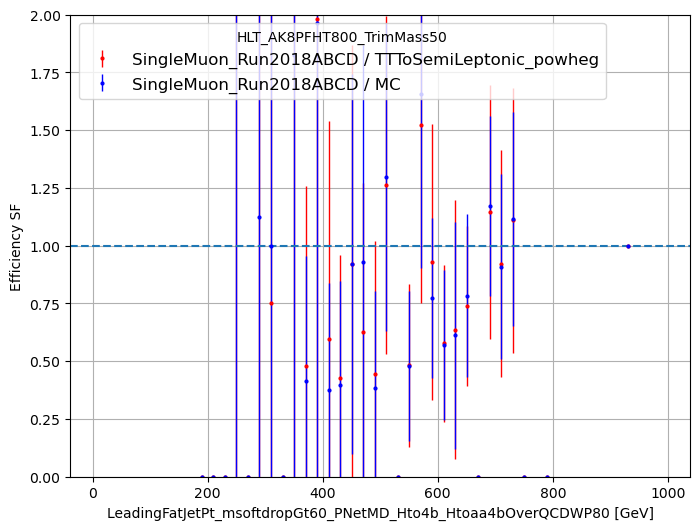

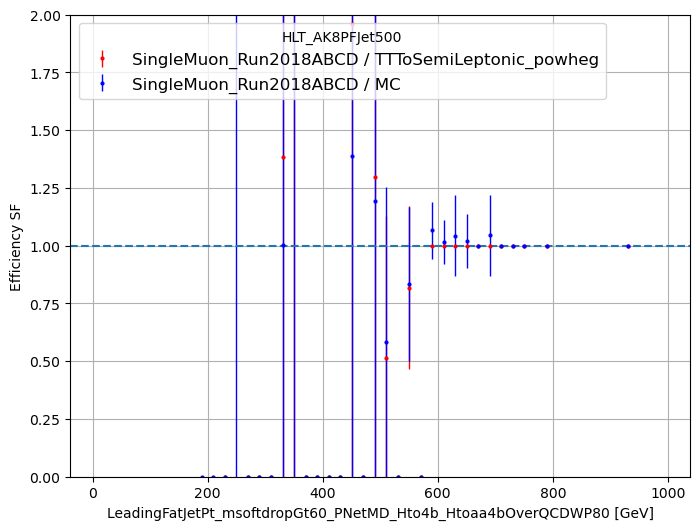

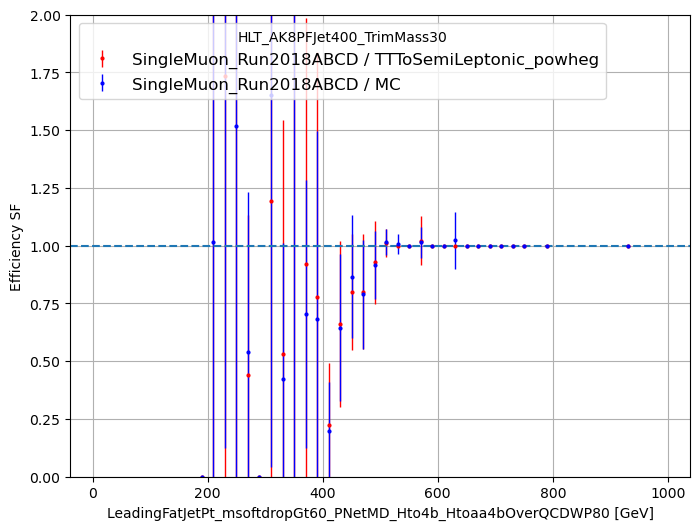

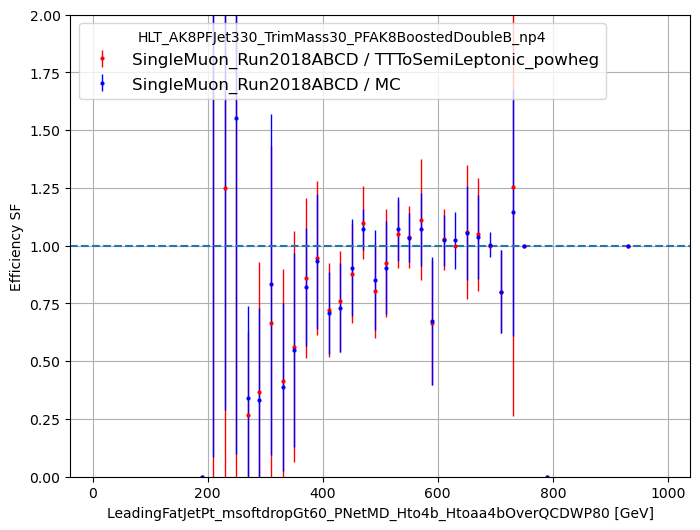

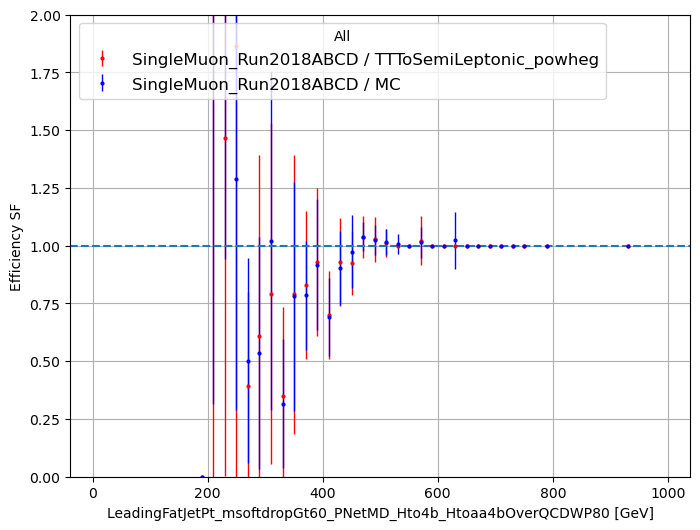

In [12]:
#colors_bkg_list = ['blue', 'orange', 'brown'] # ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71"] #['lightcoral', 'burlywood', 'cyan', 'saddlebrown', 'slateblue', 'lightpink', 'darkkhaki', 'antiquewhite', 'limegreen', 'violet', 'firebrick', 'darkorchid', 'tan', 'olive', 'purple']

colors_bkg_list = [ 
    # ['color', <transperent>, '<fill pattern>']
    ['lightcoral',    0.9,  ''],
    ['cyan',          0.9,  '' ],
    ['burlywood',     0.9,  '' ], 
    ['saddlebrown',   0.9,  '' ],
    ['slateblue',     0.9,  '' ],
    ['lightpink',     0.9,  'xx' ],
    ['darkkhaki',     0.9,  '' ],
    ['antiquewhite',  0.9,  '//' ],
    ['limegreen',     0.9,  '' ],
    ['violet',        0.9,  '' ],
    ['firebrick',     0.9,  '' ],
    ['darkorchid',    0.9,  '' ],
    ['tan',           0.9,  '' ],
    ['olive',         0.9,  '' ],
    ['purple',        0.9,  ''],
]

colors_sig_list = [
    # ['color', <transperent>, '<fill pattern>', ]
    ['blue',          0.9,  ''],
    ['red',           0.9,  ''],
    ['green',         0.9,  ''],
    ['magenta',       0.9,  ''],
    ['orange',        0.9,  ''],
]

marker_color_list = ['r', 'b', 'darkviolet', 'c', 'orange', 'green', 'magenta', 'saddlebrown', 'grey', 'yellow']
marker_style_list = ["o", "o", "o", '>', '^', 'v', 'x', 'x', 'x', "s", "+", '*',"X"]
marker_size_list  = [2, 2, 2, 2, 2, 2, 2, 2, 2]


for efficiencyHistogramNameNice in efficiencyHistograms_dict:
    xAxisRange = efficiencyHistograms_dict[efficiencyHistogramNameNice][sXRange]  if sXRange  in efficiencyHistograms_dict[efficiencyHistogramNameNice] else None
    yAxisRange = efficiencyHistograms_dict[efficiencyHistogramNameNice][sYRange]  if sYRange  in efficiencyHistograms_dict[efficiencyHistogramNameNice] else None
    xAxisLabel = efficiencyHistograms_dict[efficiencyHistogramNameNice][sXLabel]  if sXLabel  in efficiencyHistograms_dict[efficiencyHistogramNameNice] else None
    yAxisLabel = efficiencyHistograms_dict[efficiencyHistogramNameNice][sYLabel]  if sYLabel  in efficiencyHistograms_dict[efficiencyHistogramNameNice] else None
    nRebinX    = efficiencyHistograms_dict[efficiencyHistogramNameNice][sNRebinX] if sNRebinX in efficiencyHistograms_dict[efficiencyHistogramNameNice] else 1
    nRebinY    = efficiencyHistograms_dict[efficiencyHistogramNameNice][sNRebinY] if sNRebinY in efficiencyHistograms_dict[efficiencyHistogramNameNice] else 1
    #print(f"efficiencyHistograms_dict[{efficiencyHistogramNameNice}]: {efficiencyHistograms_dict[efficiencyHistogramNameNice]}")

    hEfficiency_dict = OD()
    for sampleCategoryNameNice in efficiencyHistograms_dict[efficiencyHistogramNameNice]:
        # skip running over entries for xAxisLabel, xAxisRange, nRebinX etc
        if sampleCategoryNameNice in [sXRange, sYRange, sXLabel, sYLabel, sNRebinX, sNRebinY]: continue
        if not isinstance(efficiencyHistograms_dict[efficiencyHistogramNameNice], dict): continue

        hEfficiency_dict[sampleCategoryNameNice] = OD()      
        histograms         = OD()
        histogramDimension = 0
        #print(f"{efficiencyHistogramNameNice = }, {sampleCategoryNameNice = }, efficiencyHistograms_dict[][]: {efficiencyHistograms_dict[efficiencyHistogramNameNice][sampleCategoryNameNice] =}")

        for iSelTag, sSelTagName in enumerate(efficiencyHistograms_dict[efficiencyHistogramNameNice][sampleCategoryNameNice]):
            #print(f"{efficiencyHistogramNameNice = }, {sampleCategoryNameNice = }, {sSelTagName = } ")

            efficiencyHistograms_dict_toUse = efficiencyHistograms_dict[efficiencyHistogramNameNice][sampleCategoryNameNice][sSelTagName]

            sPlotLegend = sampleCategoryNameNice

            histograms[sSelTagName]         = OD() # for efficiency histogram            
            for sHistType in [sHistNumerator, sHistDenominator]:
                hAdded = None
                for iHistToHadd in range(len(efficiencyHistograms_dict_toUse[sHistType])):
                    sIpFileNameNice_toUse = efficiencyHistograms_dict_toUse[sHistType][iHistToHadd][sIpFileNameNice]
                    sHistName_toUse       = efficiencyHistograms_dict_toUse[sHistType][iHistToHadd][sHistName]
                    fIp_toUse             = fIpFiles[sIpFileNameNice_toUse]
                    h_                    = fIp_toUse[sHistName_toUse].to_hist()

                    histogramDimension = len(h_.axes)
                    if   len(h_.axes) == 1: h_ = rebinTH1(h_, nRebinX)
                    elif len(h_.axes) == 2: h_ = rebinTH2(h_, nRebinX)
                    #h_.rebin(nRebinX)

                    if hAdded == None:
                        hAdded = h_
                    else:
                        hAdded = hAdded + h_
                histograms[sSelTagName][sHistType] = hAdded

                '''if (iSelTag == 0) and (sHistType == sHistDenominator): continue

                hStack_values[sSelTagName].append( hAdded.values() )
                hStack_uncerts[sSelTagName].append( np.sqrt(hAdded.variances()) )
                hStack_labels[sSelTagName].append( '%s %s' % (sSelTagName, sHistType) )'''

            #hEfficiency = histograms[sHistNumerator] / histograms[sHistDenominator]
            hEfficiency_values = np.divide(histograms[sSelTagName][sHistNumerator].values(), histograms[sSelTagName][sHistDenominator].values())
            hEfficiency_uncert = np.sqrt( hEfficiency_values * (1 - hEfficiency_values) / histograms[sSelTagName][sHistDenominator].values() ) # https://www.roma1.infn.it/~bini/StatEPP_new.pdf#page=27
            '''
            # update error when (y-dy) < 0
            hEfficiency_uncert = np.where(
                (hEfficiency_values - hEfficiency_uncert) < 0,
                hEfficiency_values,
                hEfficiency_uncert
            )
            # update error when (y+dy) > 1
            hEfficiency_uncert = np.where(
                (hEfficiency_values + hEfficiency_uncert) > 1,
                (1 - hEfficiency_values),
                hEfficiency_uncert
            )
            '''
            hEfficiency_dict[sampleCategoryNameNice][sSelTagName] = {
                'axes':          histograms[sSelTagName][sHistDenominator].axes,
                'values':        hEfficiency_values,
                'uncertainties': hEfficiency_uncert
            }

        fig, ax = plt.subplots(ncols=1, nrows=(histogramDimension+1), figsize=(8,6*(histogramDimension+1)))
        iPlot = 0
        for iSelTag, sSelTagName in enumerate(efficiencyHistograms_dict[efficiencyHistogramNameNice][sampleCategoryNameNice]):
            sSelTagNameNice_toUse = efficiencyHistograms_dict[efficiencyHistogramNameNice][sampleCategoryNameNice][sSelTagName][sSelTagNameNice]

            iPlot = 0
            for sHistType in [sHistDenominator, sHistNumerator]:
                if (iSelTag != 0) and (sHistType == sHistDenominator): continue
                
                # plot kinematic variable distribution used for efficiency 
                hep.histplot(
                    histograms[sSelTagName][sHistType].values(), 
                    bins=histograms[sSelTagName][sHistDenominator].axes[0].edges, 
                    yerr=np.sqrt(histograms[sSelTagName][sHistType].variances()), 
                    label='%s %s' % (sSelTagNameNice_toUse, sHistType), 
                    ax=ax[iPlot], 
                    #histtype='errorbar', 
                    #density=normalize_histogram,
                    #color=marker_color_list[iHistoToOverlay], #'r',
                    #markersize=marker_size_list[iHistoToOverlay], #3,
                    #marker=marker_style_list[iHistoToOverlay] #marker_style_list
                    )   

            # plot efficiency
            iPlot += 1
            hep.histplot(
                hEfficiency_dict[sampleCategoryNameNice][sSelTagName]['values'], 
                bins=hEfficiency_dict[sampleCategoryNameNice][sSelTagName]['axes'][0].edges, 
                yerr=hEfficiency_dict[sampleCategoryNameNice][sSelTagName]['uncertainties'], 
                label=sSelTagNameNice_toUse, 
                ax=ax[iPlot], 
                #histtype='errorbar', 
                #density=normalize_histogram,
                #color=marker_color_list[iHistoToOverlay], #'r',
                #markersize=marker_size_list[iHistoToOverlay], #3,
                #marker=marker_style_list[iHistoToOverlay] #marker_style_list
                )

        iPlot = 0
        ax[iPlot].legend(fontsize=10, loc='upper right', bbox_to_anchor=(1.0, 1.4, ))
        if xAxisLabel: ax[iPlot].set_xlabel(xAxisLabel)
        if yAxisLabel: ax[iPlot].set_ylabel(yAxisLabel)
        else:          ax[iPlot].set_ylabel('No. of events')
        if xAxisRange: ax[iPlot].set_xlim(xAxisRange)
        if histogramDimension == 1: ax[iPlot].set_yscale('log', base=10)
        ax[iPlot].grid(True)
        ax[iPlot].text(0.7, 0.9, sampleCategoryNameNice,
            fontsize=12, fontstyle='italic',
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax[iPlot].transAxes
            )


        iPlot += 1
        if xAxisLabel: ax[iPlot].set_xlabel(xAxisLabel)
        ax[iPlot].set_ylabel('Efficiency')
        if xAxisRange: ax[iPlot].set_xlim(xAxisRange)
        ax[iPlot].set_ylim(0, 1.8)
        ax[iPlot].legend(fontsize=10, loc='upper left')
        ax[iPlot].grid(True)
        ax[iPlot].text(0.2, 0.6, sampleCategoryNameNice,
            fontsize=12, fontstyle='italic',
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax[iPlot].transAxes
            )            

        #fig.savefig('%s/%s_%s_triggerEfficiency.png' % (sOpDir,efficiencyHistogramNameNice,sampleCategoryNameNice), transparent=False, dpi=80, bbox_inches="tight")
        #plt.close(fig)
        

    
    # plot Data/MC efficiency SFs    
    for sSelTagName in efficiencyHistograms_dict[efficiencyHistogramNameNice][sampleCategory_Data_forEffiSF]: # loop over Triggers
        sSelTagNameNice_toUse = efficiencyHistograms_dict[efficiencyHistogramNameNice][sampleCategoryNameNice][sSelTagName][sSelTagNameNice]

        fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,6))

        for iSampleCat, sampleCategory_MC_forEffiSF in enumerate(sampleCategory_MC_forEffiSF_list):
            N_  = hEfficiency_dict[sampleCategory_Data_forEffiSF][sSelTagName]['values']
            D_  = hEfficiency_dict[sampleCategory_MC_forEffiSF][sSelTagName]['values']
            eN_ = hEfficiency_dict[sampleCategory_Data_forEffiSF][sSelTagName]['uncertainties']
            eD_ = hEfficiency_dict[sampleCategory_MC_forEffiSF][sSelTagName]['uncertainties']
            hSF_values = np.divide(N_, D_)
            hSF_uncert = np.sqrt( (eN_**2 / D_**2) + ((N_ * eD_)**2 / D_**4) )
            X  = hEfficiency_dict[sampleCategory_Data_forEffiSF][sSelTagName]['axes'][0].centers
            eX = (hEfficiency_dict[sampleCategory_Data_forEffiSF][sSelTagName]['axes'][0].edges[1:] - hEfficiency_dict[sampleCategory_Data_forEffiSF][sSelTagName]['axes'][0].edges[0:-1]) / 2
            
            hep.histplot(
                hSF_values, bins=hEfficiency_dict[sampleCategory_Data_forEffiSF][sSelTagName]['axes'][0].edges, yerr=hSF_uncert, 
                label='%s / %s' % (sampleCategory_Data_forEffiSF, sampleCategory_MC_forEffiSF), 
                ax=ax, 
                histtype='errorbar', 
                #density=normalize_histogram,
                color=marker_color_list[iSampleCat], #'r',
                markersize=marker_size_list[0], #3,
                marker=marker_style_list[0] #marker_style_list
            )
            '''ax.errorbar(x = X, y = hSF_values, xerr = eX, yerr = hSF_uncert, 
                label='%s / %s' % (sampleCategory_Data_forEffiSF, sampleCategory_MC_forEffiSF), 
                color=marker_color_list[iSampleCat],
                markersize=marker_size_list[0],
                marker=marker_style_list[0]
                )'''

        if xAxisLabel: ax.set_xlabel(xAxisLabel)
        ax.set_ylabel('Efficiency SF')
        ax.set_ylim(0., 2)
        ax.legend(fontsize=12, title=sSelTagNameNice_toUse, loc='upper left') 
        ax.axhline(y=1, linestyle='--')   
        ax.grid(True)

        #fig.savefig('%s/%s_SF_%s.png' % (sOpDir,efficiencyHistogramNameNice, sSelTagName), transparent=False, dpi=80, bbox_inches="tight")
        #plt.close(fig)
